In [1]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
df = pd.read_csv("datasets train/train_Kabupaten Bekasi_Public Health .csv")
del df['full_text']

In [5]:
df

,Unnamed: 0,created_at,text
0,0,Thu Jul 09 10:40:34 +0000 2020,Plt. Puskesmas Telaga Murni Gandatua Ariston S...
1,1,Tue May 28 03:12:47 +0000 2019,Ruang Thalasemia dan Bank Darah RSUD Kabupaten...
2,2,Fri Feb 05 11:30:47 +0000 2016,"Sejak Awal 2016, 7 Orang Meninggal Akibat DBD ..."
3,3,Wed Jun 10 03:15:05 +0000 2020,Ungkap Angka Kehamilan Kabupaten Bekasi saat W...
4,4,Wed Feb 18 07:44:38 +0000 2015,Terbaru:BREAKING NEWS: Mantan Dirut RSUD Kabup...
...,...,...,...
566,566,Fri Feb 13 00:26:19 +0000 2015,#InfoBUC Kasus DBD Kabupaten Bekasi Alami Penu...
567,567,Thu Oct 30 16:07:57 +0000 2014,Cara Berobat ke RSUD Kabupaten Bekasi Mengguna...
568,568,Tue May 07 15:26:14 +0000 2019,Ketua KPU Kabupaten Bekasi Dilarikan ke Rumah ...
569,569,Thu Jul 26 15:00:48 +0000 2018,"Dari 39 Puskesmas Di Kabupaten Bekasi, 3 Puske..."


In [ ]:
def textTranslate(text):
    strText = str( text.strip() )
    traslatedblob = TextBlob( strText ).translate(to='en')
    strTranslated = str(traslatedblob) 
    return strTranslated

df['tweet_en'] = df['text'].str.encode('ascii', 'ignore').apply(textTranslate)

In [10]:
def getSubjectivity(text):
    c = str(text)
    return TextBlob(c).sentiment.subjectivity

def getPolarity(text):
    c = str(text)
    return TextBlob(c).sentiment.polarity

df['Subjectivity'] = df['text'].apply(getSubjectivity)
df['Polarity'] = df['text'].apply(getPolarity)

In [11]:
df

,Unnamed: 0,created_at,text,Subjectivity,Polarity
0,0,Thu Jul 09 10:40:34 +0000 2020,Plt. Puskesmas Telaga Murni Gandatua Ariston S...,0.0,0.0
1,1,Tue May 28 03:12:47 +0000 2019,Ruang Thalasemia dan Bank Darah RSUD Kabupaten...,0.0,0.0
2,2,Fri Feb 05 11:30:47 +0000 2016,"Sejak Awal 2016, 7 Orang Meninggal Akibat DBD ...",0.0,0.0
3,3,Wed Jun 10 03:15:05 +0000 2020,Ungkap Angka Kehamilan Kabupaten Bekasi saat W...,0.0,0.0
4,4,Wed Feb 18 07:44:38 +0000 2015,Terbaru:BREAKING NEWS: Mantan Dirut RSUD Kabup...,0.0,0.0
...,...,...,...,...,...
566,566,Fri Feb 13 00:26:19 +0000 2015,#InfoBUC Kasus DBD Kabupaten Bekasi Alami Penu...,0.0,0.0
567,567,Thu Oct 30 16:07:57 +0000 2014,Cara Berobat ke RSUD Kabupaten Bekasi Mengguna...,0.0,0.0
568,568,Tue May 07 15:26:14 +0000 2019,Ketua KPU Kabupaten Bekasi Dilarikan ke Rumah ...,0.0,0.0
569,569,Thu Jul 26 15:00:48 +0000 2018,"Dari 39 Puskesmas Di Kabupaten Bekasi, 3 Puske...",0.0,0.0


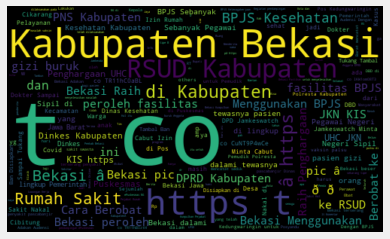

In [12]:
#wordcloud
allwords = ' '.join([twts for twts in df['text']])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allwords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [13]:
def getAnalysis(score):
    if score < 0 :
        return 'Negative'
    elif score == 0 :
        return 'Neutral'
    else :
        return 'Positive'

df['Sentiment'] = df['Polarity'].apply(getAnalysis)

df

,Unnamed: 0,created_at,text,Subjectivity,Polarity,Sentiment
0,0,Thu Jul 09 10:40:34 +0000 2020,Plt. Puskesmas Telaga Murni Gandatua Ariston S...,0.0,0.0,Neutral
1,1,Tue May 28 03:12:47 +0000 2019,Ruang Thalasemia dan Bank Darah RSUD Kabupaten...,0.0,0.0,Neutral
2,2,Fri Feb 05 11:30:47 +0000 2016,"Sejak Awal 2016, 7 Orang Meninggal Akibat DBD ...",0.0,0.0,Neutral
3,3,Wed Jun 10 03:15:05 +0000 2020,Ungkap Angka Kehamilan Kabupaten Bekasi saat W...,0.0,0.0,Neutral
4,4,Wed Feb 18 07:44:38 +0000 2015,Terbaru:BREAKING NEWS: Mantan Dirut RSUD Kabup...,0.0,0.0,Neutral
...,...,...,...,...,...,...
566,566,Fri Feb 13 00:26:19 +0000 2015,#InfoBUC Kasus DBD Kabupaten Bekasi Alami Penu...,0.0,0.0,Neutral
567,567,Thu Oct 30 16:07:57 +0000 2014,Cara Berobat ke RSUD Kabupaten Bekasi Mengguna...,0.0,0.0,Neutral
568,568,Tue May 07 15:26:14 +0000 2019,Ketua KPU Kabupaten Bekasi Dilarikan ke Rumah ...,0.0,0.0,Neutral
569,569,Thu Jul 26 15:00:48 +0000 2018,"Dari 39 Puskesmas Di Kabupaten Bekasi, 3 Puske...",0.0,0.0,Neutral


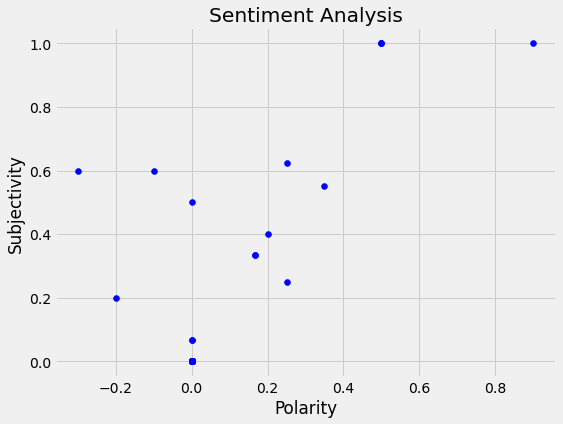

In [14]:
#plot the polarity and subjectivity
plt.figure(figsize =(8,6))
for i in range (0, df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color = 'Blue')

plt.title("Sentiment Analysis")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show()

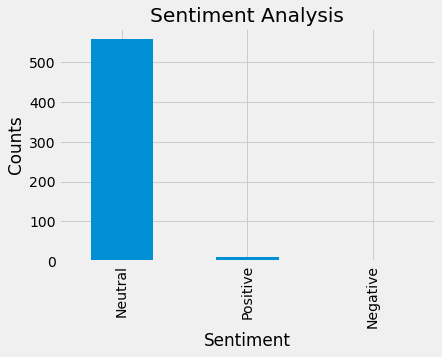

In [15]:
#Plot the sentiment
df['Sentiment'].value_counts()

plt.title("Sentiment Analysis")
plt.xlabel("Sentiment")
plt.ylabel("Counts")
df['Sentiment'].value_counts().plot(kind = "bar")
plt.show()